In [1]:
# importing the necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [12]:
# Loading the dataset 
import pandas as pd
data = pd.read_csv("ECommerce_consumer behaviour.csv")
df = pd.DataFrame(data)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [14]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [15]:
df.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [16]:
# fill NAN values in "days_since_prior_order" column with -1 
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(-1)
# changing the type of the values to int64
df['days_since_prior_order'] = df['days_since_prior_order'].astype('int64')

In [17]:
# change the type of 'department_id' to categorical
df['department_id'] = df['department_id'].astype('category')
# change the type of 'product_id' to categorical 
df['product_id'] = df['product_id'].astype('category')
# change the type of 'order_id' to categorical 
df['order_id'] = df['order_id'].astype('category')
# change the type of 'user_id' to categorical 
df['user_id'] = df['user_id'].astype('category')
# change the type of 'reordered' to boolean
df['reordered'] = df['reordered'].astype('bool')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                category
 1   user_id                 category
 2   order_number            int64   
 3   order_dow               int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  int64   
 6   product_id              category
 7   add_to_cart_order       int64   
 8   reordered               bool    
 9   department_id           category
 10  department              object  
 11  product_name            object  
dtypes: bool(1), category(4), int64(5), object(2)
memory usage: 141.4+ MB


In [19]:
df.groupby('user_id').mean(numeric_only=True)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_16868\1244297632.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('user_id').mean(numeric_only=True)


,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
user_id,,,,,,
2,2.454545,3.181818,10.000000,6.818182,3.272727,0.363636
3,4.894737,1.947368,18.473684,12.421053,3.947368,0.473684
7,3.000000,0.000000,18.000000,30.000000,12.500000,0.833333
10,4.000000,3.000000,15.000000,14.000000,15.500000,0.433333
11,5.000000,5.000000,11.000000,30.000000,6.000000,0.272727
...,...,...,...,...,...,...
206204,2.000000,5.000000,8.000000,11.000000,10.500000,0.200000
206205,3.000000,5.000000,16.000000,10.000000,4.000000,0.857143
206206,35.533333,2.066667,17.933333,2.666667,3.133333,0.733333


### Checking for Outliers

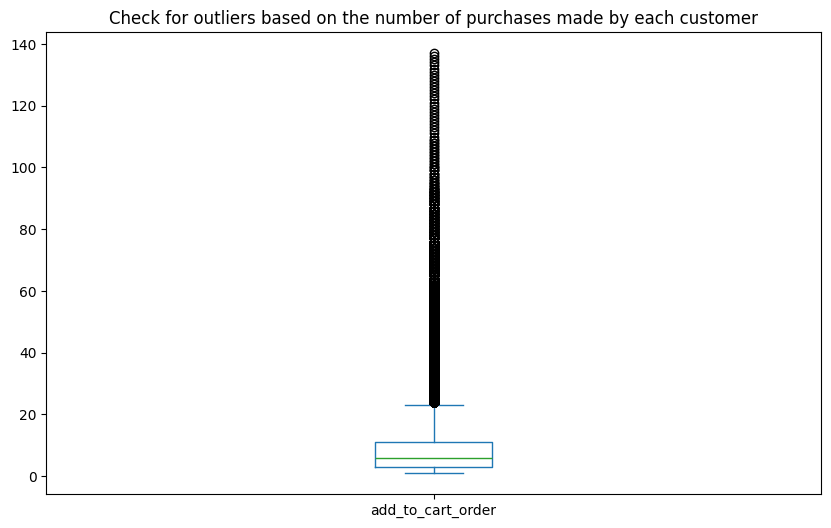

In [20]:
df['add_to_cart_order'].plot(kind='box', figsize=(10,6))
plt.title('Check for outliers based on the number of purchases made by each customer')
plt.show()

In [21]:
means = df.groupby('user_id').mean(numeric_only=True)

# calculate the threshold for outliers based on 'add_to_cart_order'. 

Q1 = means['add_to_cart_order'].quantile(0.25)
Q3 = means['add_to_cart_order'].quantile(0.75)

threshold = Q3 + 1.5 * (Q3 - Q1)

# obtain the outlier customers based on 'add_to_cart_order'
outliers_cart = means[means['add_to_cart_order'] > threshold]



C:\Users\Pranav\AppData\Local\Temp\ipykernel_16868\36665213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('user_id').mean(numeric_only=True)


In [22]:
outliers_cart

,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
user_id,,,,,,
10,4.000000,3.000000,15.000000,14.00000,15.500000,0.433333
133,11.000000,3.000000,13.000000,5.00000,15.500000,0.400000
197,7.000000,6.000000,14.000000,6.00000,15.000000,0.793103
216,5.000000,5.000000,15.000000,24.00000,15.000000,0.172414
264,29.000000,2.000000,9.000000,9.00000,15.000000,0.827586
...,...,...,...,...,...,...
205789,13.000000,6.000000,12.000000,7.00000,15.500000,0.600000
205926,11.000000,1.000000,15.000000,6.00000,18.000000,0.514286
205956,3.000000,3.000000,14.000000,30.00000,17.000000,0.303030


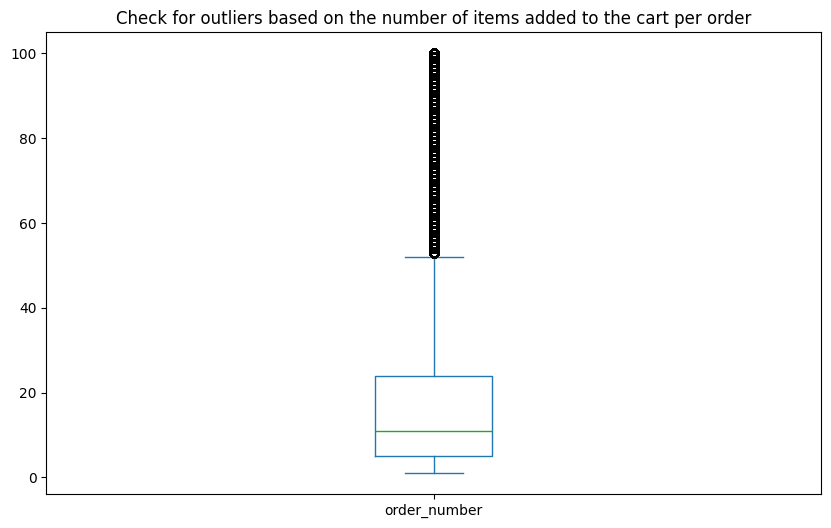

In [23]:
df['order_number'].plot(kind='box', figsize=(10,6))
plt.title('Check for outliers based on the number of items added to the cart per order')
plt.show()

In [24]:
orders = df.groupby("user_id")["order_number"].agg(["mean", "std"])

# calculate the lower and upper bounds for outliers.
# based on the number of purchases

lower = orders['mean'] - 3 * orders['std']
lower.name = 'order_number_lower'

upper = orders["mean"] + 3 * orders["std"]
upper.name = 'order_number_upper'

# join the lower and upper bounds to the original dataframe on user_id
df = df.join(lower, on='user_id')
df = df.join(upper, on='user_id')

C:\Users\Pranav\AppData\Local\Temp\ipykernel_16868\154012839.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders = df.groupby("user_id")["order_number"].agg(["mean", "std"])


In [25]:
# obtain the outliers. 
outliers_orders = df[(df["order_number"] < df['order_number_lower']) | (df["order_number"] > df['order_number_upper'])]

In [27]:
outliers_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_number_lower,order_number_upper
2538,677735,175561,2,3,12,16,32,1,False,4,produce,packaged produce,7.467505,52.722971
8764,2018358,185514,22,4,17,17,128,1,False,3,bakery,tortillas flat bread,-5.770319,18.847242
8765,2018358,185514,22,4,17,17,54,2,True,17,household,paper goods,-5.770319,18.847242
15536,2545752,185279,9,5,9,12,84,1,False,16,dairy eggs,milk,10.001293,28.306399
16290,1365995,136421,1,3,10,-1,88,1,False,13,pantry,spreads,1.544766,74.812377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010592,1097536,97028,5,0,16,7,24,1,True,4,produce,fresh fruits,-0.146102,4.574673
2010593,1097536,97028,5,0,16,7,24,2,False,4,produce,fresh fruits,-0.146102,4.574673
2015806,1581072,93695,5,4,17,30,97,1,False,13,pantry,baking supplies decor,3.364384,4.740879
2016905,1373400,139870,11,2,12,30,116,1,False,1,frozen,frozen produce,-2.906531,10.137300


In [28]:
# drop the outliers 
outliers_orders= outliers_orders.drop([21882, 85422, 88725, 156668], axis=0)
df = df.drop(outliers_cart.index)
df = df.drop(outliers_orders.index)

## Exploring the data

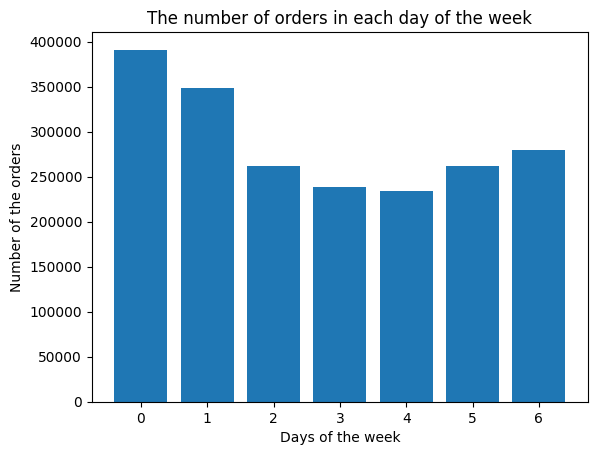

In [29]:
# finding the relationship between the days of the week and the number of orders
plt.bar(df.groupby('order_dow').size().index, df.groupby('order_dow').size().values)
plt.title('The number of orders in each day of the week')
plt.xlabel('Days of the week')
plt.ylabel('Number of the orders')
plt.show()

**Note:                                           
You can see that the highest number of orders at Hunter’s store are on Mondays and then Tuesdays. We see that it decreases during the week and increases slightly at the end of the week.**

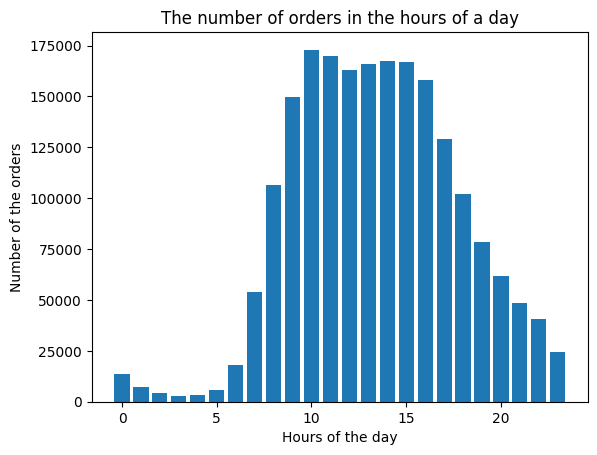

In [30]:
# finding the relationship between the hours in a day and the number of orders
plt.bar(df.groupby('order_hour_of_day').size().index, df.groupby('order_hour_of_day').size().values)
plt.title('The number of orders in the hours of a day')
plt.xlabel('Hours of the day')
plt.ylabel('Number of the orders')
plt.show()

**Note:
As can be seen in the chart above, the highest number of orders occurs around 10:00 to 16:00.**

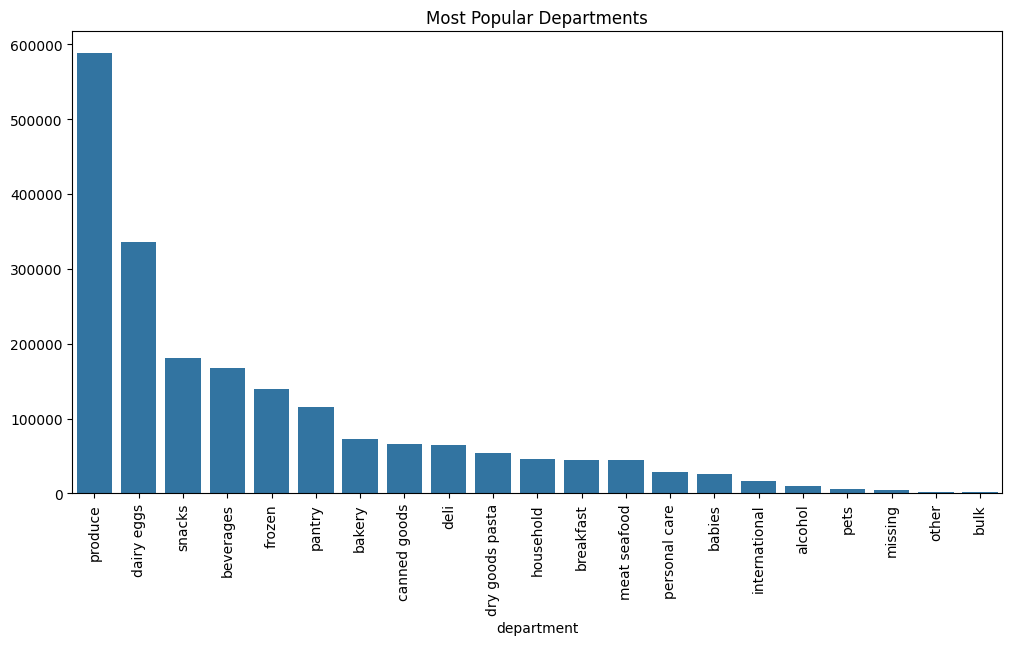

In [31]:
# find the most popular department 
counts = df['department'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=counts.index, y=counts.values)
plt.title('Most Popular Departments')
plt.xticks(rotation=90)
plt.show()

**Note:
we can see that Produce, Dairy Eggs, Snacks, Beverages and Frozen are the five most popular departments.**

In [32]:
# find the most the reorderd products 
reorderds = df.groupby('product_name').sum(numeric_only=True)['reordered'].sort_values(ascending=False)

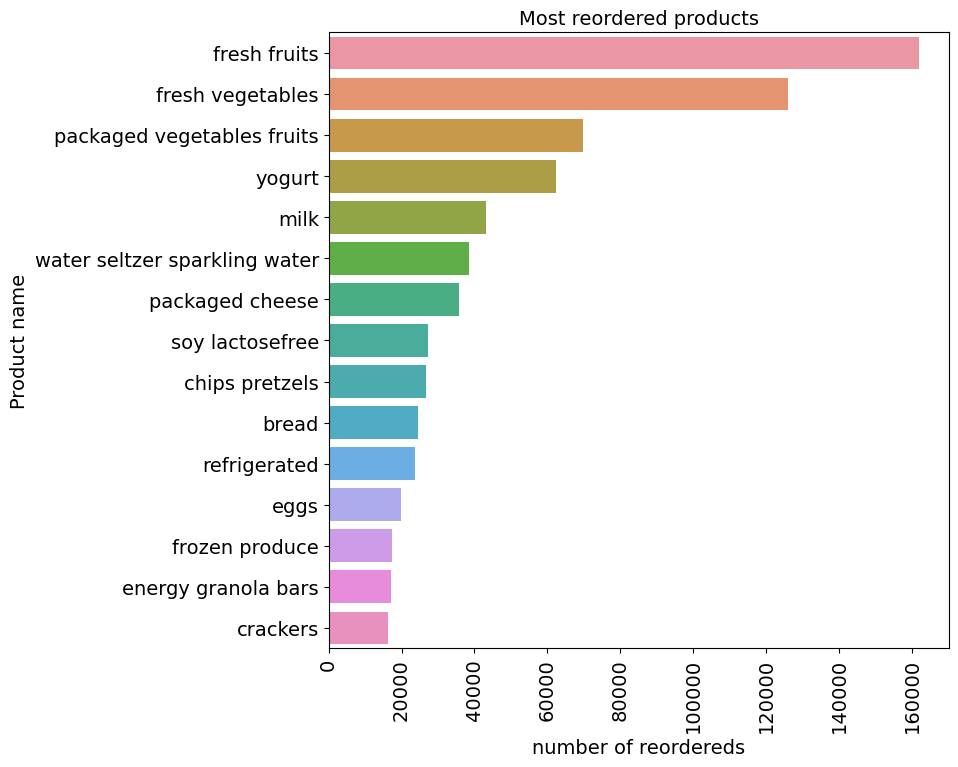

In [22]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=reorderds[0:15].values, y=reorderds[0:15].index, orient='h')
plt.title('Most reordered products', fontsize=14)
plt.xticks(rotation=90)
ax.set_xlabel('number of reordereds', fontsize=14)
ax.set_ylabel('Product name', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
plt.show()

**Note: As you can see, Fresh fruits, Fresh vegetables, Packaged vegetable fruits, Yogurt and Milk are the five most reordered products.**

In [33]:
# finding the most popular products in each department 
product_d = pd.crosstab(df['department'], df['product_name'])
product_d.idxmax(axis=1).to_frame(name="Most popular Product")

,Most popular Product
department,
alcohol,beers coolers
babies,baby food formula
bakery,bread
beverages,water seltzer sparkling water
breakfast,cereal
bulk,bulk grains rice dried goods
canned goods,soup broth bouillon
dairy eggs,yogurt
deli,lunch meat


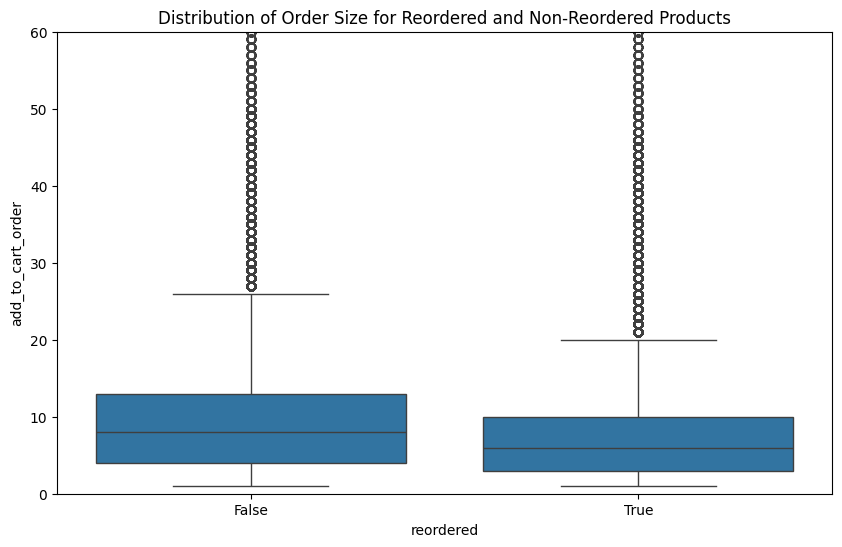

In [34]:
plt.figure(figsize=(10,6)) 
sns.boxplot(x='reordered', y='add_to_cart_order', data=df)
plt.title('Distribution of Order Size for Reordered and Non-Reordered Products')
plt.ylim(0, 60)
plt.show()

**Note:**

- **The median score for non-reordered products is higher than reordered, which means that on average, more non-reordered products have been added to the shopping cart, than reordered products.** 

- **The larger size of the box and whiskers of the non-reordered products indicates that there is more variability in the non-reordered data than in the reordered ones.
At last, we can see that the non-reordered data has a much larger maximum value than reordered data.**

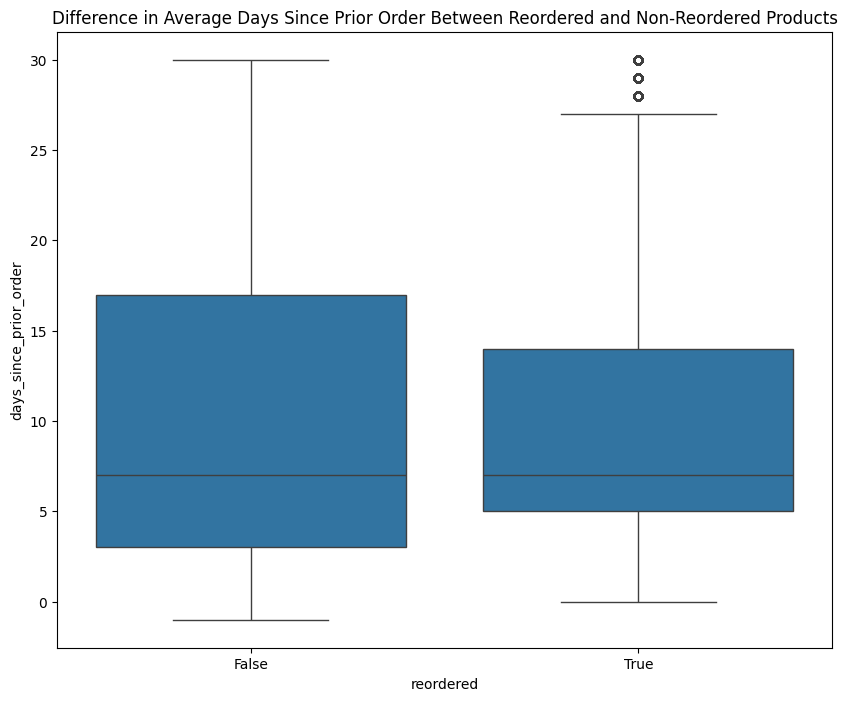

In [35]:
# find the difference in the average days_since_prior_order between reordered and non-reordered products.
plt.figure(figsize=(10,8)) 
sns.boxplot(x='reordered', y='days_since_prior_order', data=df)
plt.title('Difference in Average Days Since Prior Order Between Reordered and Non-Reordered Products')
plt.show()

In [36]:
df.groupby('reordered').median(numeric_only=True)['days_since_prior_order']

reordered
False    7.0
True     7.0
Name: days_since_prior_order, dtype: float64

**Note:**
- **We can see that both distributions have the same median score (7.0), which indicates that on average, both have the same number of days since prior order.** 
- **The larger size of the box and whiskers of the non-reordered products shows that there is more variability in the non-reordered data than in the reordered ones based on the number of days passed since the prior order.**
- **The location of the median in both distributions is closer to lower quantile which means that the distribution is positively skewed. This means that there are more low values than high values in the data, and the data has a long tail to the right.**

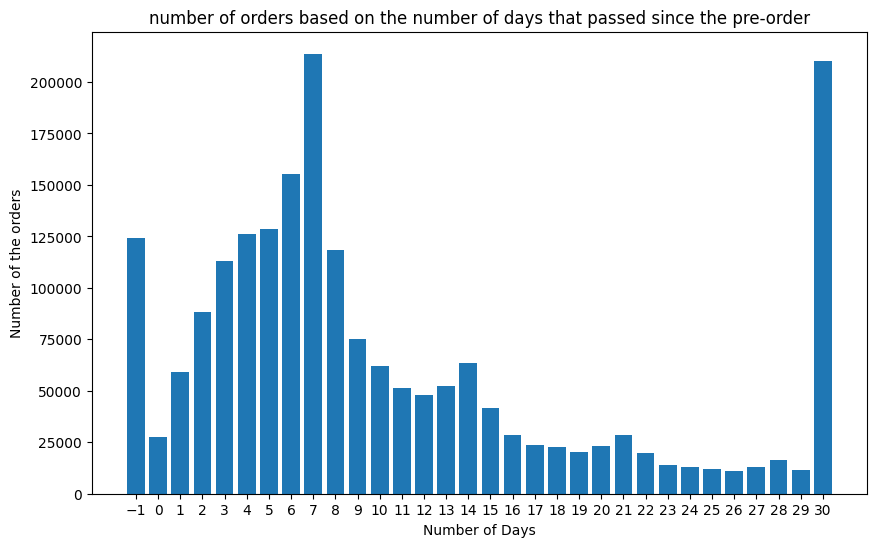

In [37]:
# finding the relationship the number of orders and days passes since prior order of that.
plt.figure(figsize=(10,6))
plt.bar(df.groupby('days_since_prior_order').size().index, df.groupby('days_since_prior_order').size().values)
plt.title('number of orders based on the number of days that passed since the pre-order')
plt.xlabel('Number of Days')
plt.ylabel('Number of the orders')
plt.xticks(range(-1, 31))
plt.show()

**Note:**

**The above chart shows that most customers wait 5-7 days to reorder. It’s worth noting that a significant number of customers wait 30 days before ordering again.**

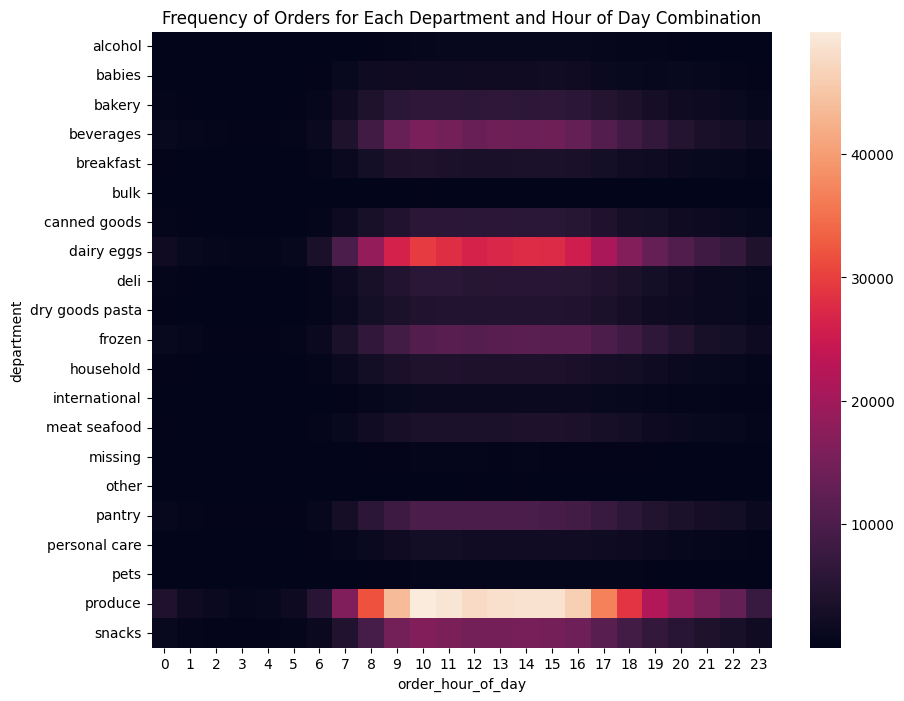

In [38]:
# finding a relationship between departments and order_hour_of_day.
order_frequency = df.pivot_table(index='department', columns='order_hour_of_day', aggfunc='size', fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(order_frequency)
plt.title('Frequency of Orders for Each Department and Hour of Day Combination')
plt.show()

**Note:**

**we can see that a large number of orders per day are made from the "Produce" department of the store between 9:00 and 18:00. Departments “bulk” and “Pets” do not have significant sales during the day.**

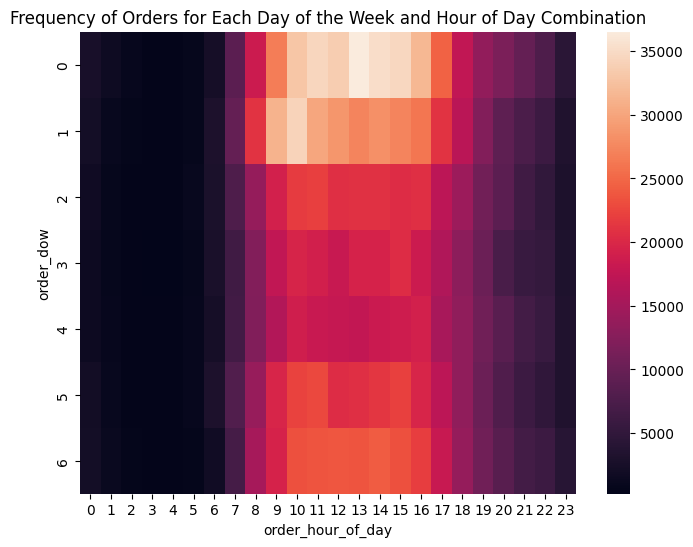

In [39]:
# finding a relationship between order_dow and order_hour_of_day.
order_frequency = df.pivot_table(index='order_dow', columns='order_hour_of_day', aggfunc='size', fill_value=0)
plt.figure(figsize=(8,6))
sns.heatmap(order_frequency)
plt.title('Frequency of Orders for Each Day of the Week and Hour of Day Combination')
plt.show()

**Note:**

**we can make the same observations as before. This chart shows that the growth in the number of orders in each day starts at 7:00 and peaks at 13:00 or 14:00 for some days and 11:00 for others. It also shows that the highest number of orders occur between 10:00 and 15:00 on Mondays and 9:00 to 10:00 on Tuesdays.**

## K-means clustering 

In [40]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale, StandardScaler, normalize

In [41]:
# scaling the data with standardizing the features 
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df.iloc[:, :-4])

In [42]:
# finding the optimal number of clusters in k-means 

inertia = [] 
silhouette = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(scaled_data)
    k_in = kmeans.inertia_
    print('checke with {} clusters | Inertia : {}'.format(k, k_in))
    inertia.append(k_in)
    labels = kmeans.fit_predict(scaled_data)
    silhouette.append(silhouette_score(scaled_data, labels, sample_size=10000))

checke with 2 clusters | Inertia : 18547911.47710687
checke with 3 clusters | Inertia : 16803264.887409553
checke with 4 clusters | Inertia : 15809126.918312903
checke with 5 clusters | Inertia : 15201104.61931771
checke with 6 clusters | Inertia : 14519396.474782713
checke with 7 clusters | Inertia : 13800267.961906062
checke with 8 clusters | Inertia : 13378748.456463097
checke with 9 clusters | Inertia : 13200161.50608976
checke with 10 clusters | Inertia : 12778006.322304506


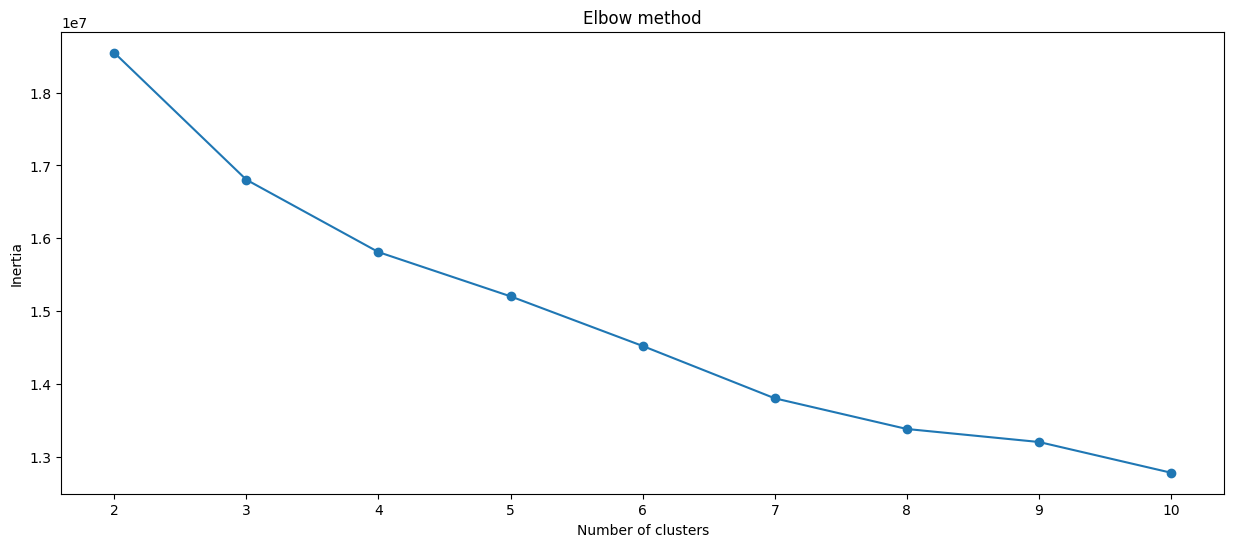

In [43]:
# ploting the Elbow method 
plt.figure(figsize=(15,6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

**Note:**

**From the above plot we can come to an understanding that the inertia score starts to drop drastically between 5-6 number of clusters. Therefore, we can choose 6 number of clusters to grain granularity on our study.**

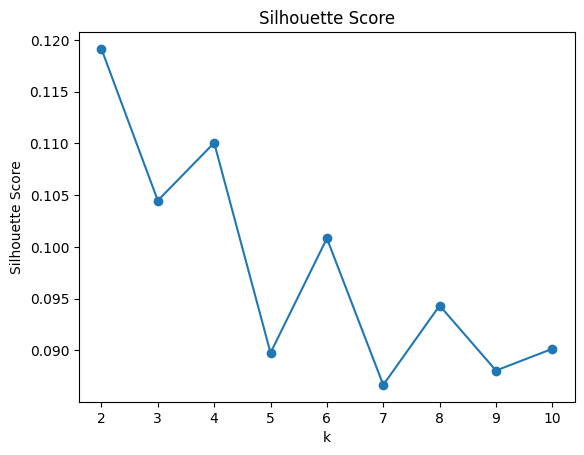

In [44]:
# Plotting the silhouette score
plt.plot(range(2, 11), silhouette, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

**Note:**

**The plot below also shows that the silhouette score of 6 clusters is higher than 5 clusters, which gives more confidence to our choice.**

In [35]:
# Ploting the data points with different colors for different clusters
# kmeans = KMeans(n_clusters=k)
# kmeans.fit(scaled_data)
# labels = kmeans.fit_predict(scaled_data)
# plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
# plt.show()

### K means with 6 cluster. 

In [51]:
# Chossing k = 6 as the optimal number of clusters 
kmeans = KMeans(n_clusters=6, n_init='auto')
kmeans.fit(scaled_data)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [52]:
# Ploting the clusters in 2D using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

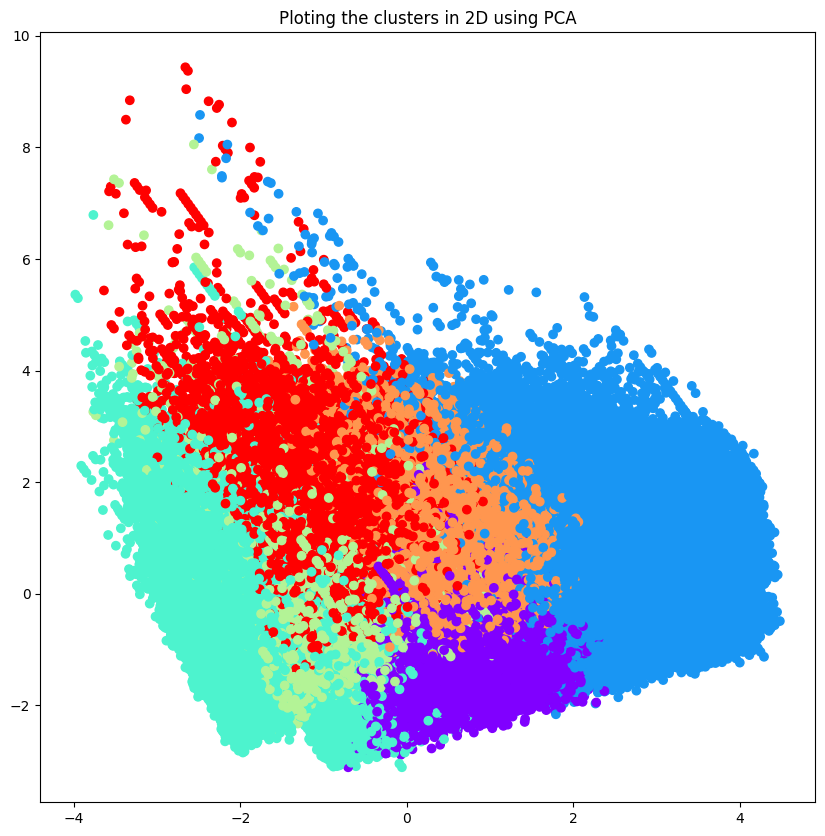

In [53]:
plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='rainbow')

plt.title('Ploting the clusters in 2D using PCA')
plt.show()

In [54]:
# Ploting the clusters in 3D using PCA 
pca = PCA(n_components=3, random_state=0)
pca_data = pca.fit_transform(scaled_data)

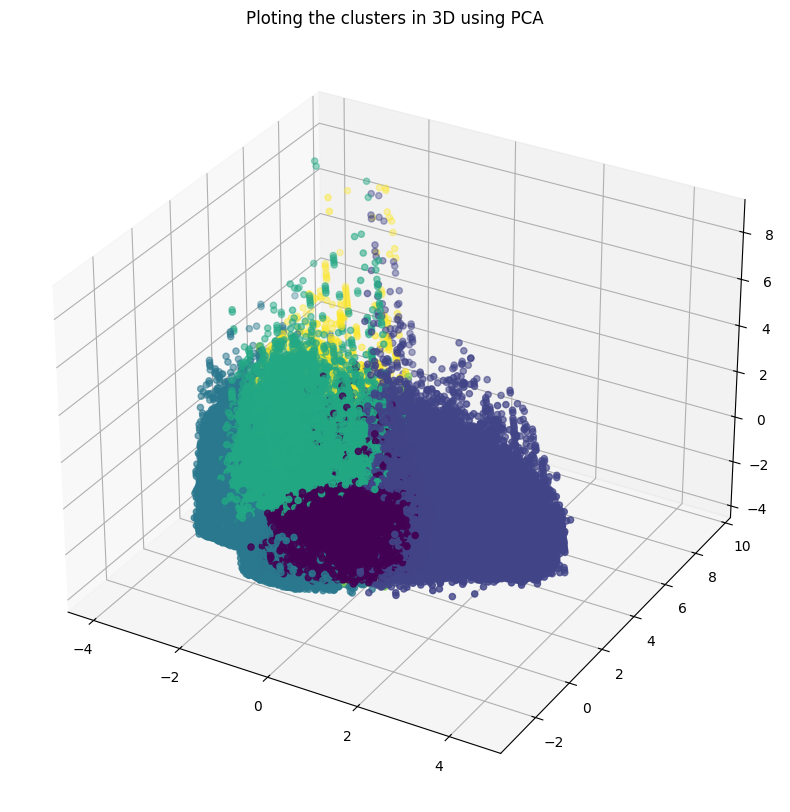

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax =fig.add_subplot(111, projection='3d')
plt.title('Ploting the clusters in 3D using PCA')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=kmeans_labels, cmap='viridis')
plt.show()

## Experimenting other clustering algorithms
**(and compare their performance with K-means)**

In [61]:
!pip install numpy
!pip install kmodes
!pip install --upgrade pip setuptools
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install backend dependencies did not run successfully.
  exit code: 1
  
  [36 lines of output]
    Using cached ninja-1.11.1.1.tar.gz (132 kB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
    Preparing metadata (pyproject.toml): started
    Preparing metadata (pyproject.toml): finished with status 'done'
    error: subprocess-exited-with-error
  
    exit code: 1
  
    [13 lines of output]
    C:\Users\Pranav\AppData\Local\Temp\pip-build-env-eee3v_e5\overlay\lib\python3.10\site-packages\setuptools_scm\git.py:308: UserWarning: git archive did not support describe output
      warnings.warn("git archive did not support describe output")
    C:\Users\Pranav\AppData\Local\Temp\pip-build-env-eee3v_e5\overlay\lib\python3.10\site-packages\setuptools_scm\g

  Using cached kmodes-0.12.2-py2.py3-none-any.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install backend dependencies did not run successfully.
  exit code: 1
  
  [36 lines of output]
    Using cached ninja-1.11.1.1.tar.gz (132 kB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
    Preparing metadata (pyproject.toml): started
    Preparing metadata (pyproject.toml): finished with status 'done'
    error: subprocess-exited-with-error
  
    exit code: 1
  
    [13 lines of output]
    C:\Users\Pranav\AppData\Local\Temp\pip-build-env-19jwzafh\overlay\lib\python3.10\site-packages\setuptools_scm\git.py:308: UserWarning: git archive did not support describe output
      warnings.warn("git archive did not support describe output")
    C:\Users\Pranav\AppData\Local\Temp\pip-build-env-19jwzafh\overlay\lib\python3.10\site-packages\setuptools_scm\g

  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.0.1
    Uninstalling setuptools-65.0.1:
      Successfully uninstalled setuptools-65.0.1


ModuleNotFoundError: No module named 'kmodes'

In [62]:
sample_size = 10000 # Set the sample size as needed
sampled_data = scaled_data[np.random.choice(scaled_data.shape[0], sample_size, replace=False), :]

In [63]:
# K-means 
kmeans = KMeans(n_clusters=6, n_init='auto')
kmeans.fit(sampled_data)
kmeans_labels = kmeans.fit_predict(sampled_data)

In [64]:
# DBSCAN 
dbscan = DBSCAN(eps=2, min_samples=4)
dbscan.fit(sampled_data)
dbscan_labels = dbscan.fit_predict(sampled_data)

In [65]:
# Ploting the clusters made ny DBSCAN in 2D using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(sampled_data)

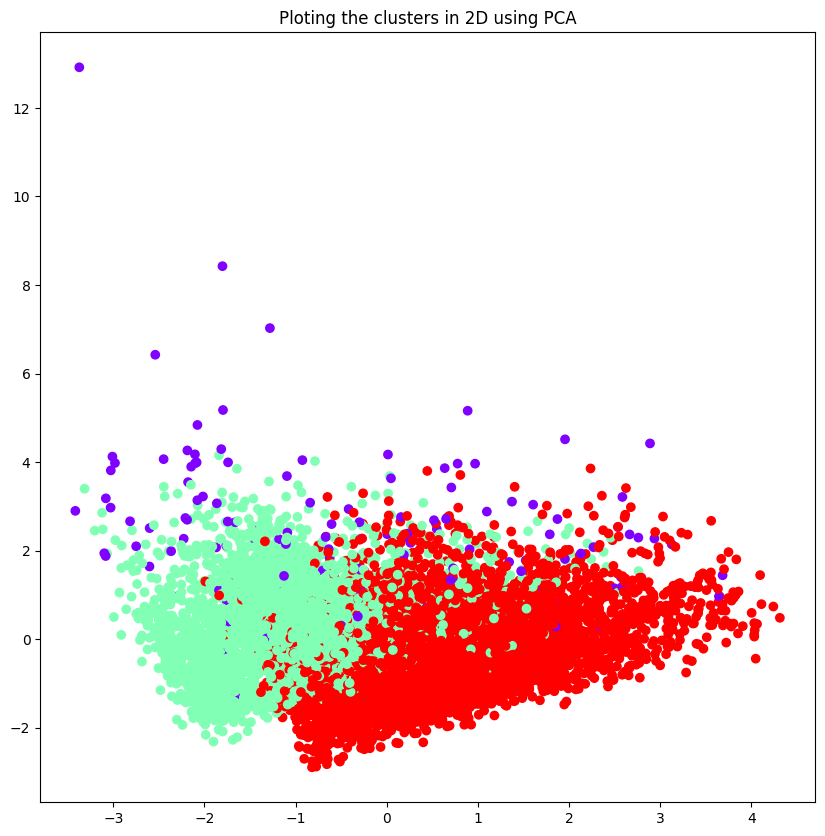

In [66]:
plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='rainbow')

plt.title('Ploting the clusters in 2D using PCA')
plt.show()

In [67]:
# Hierachial clustering (linkage criteria : Ward)
hierarchical = AgglomerativeClustering(n_clusters=6)
hierarchical.fit(sampled_data)
h_labels = hierarchical.fit_predict(sampled_data)

In [68]:
# Calculate the Silhouette Coefficient for each algorithm
kmeans_silhouette = silhouette_score(sampled_data, kmeans_labels)
dbscan_silhouette = silhouette_score(sampled_data, dbscan_labels)
hierarchical_silhouette = silhouette_score(sampled_data, h_labels)

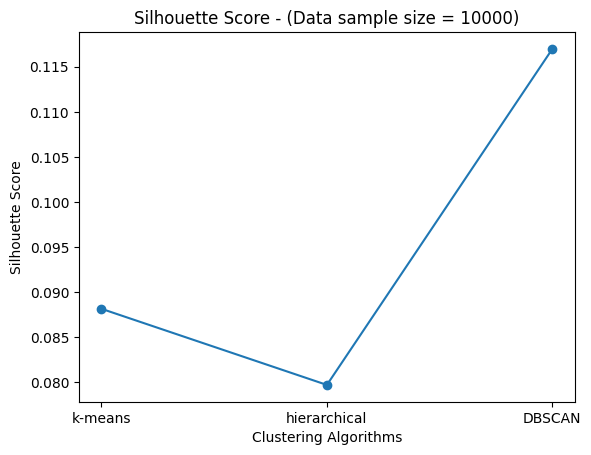

In [69]:
# Plotting the silhouette score
s_score = [kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette]
plt.plot(['k-means', 'hierarchical', 'DBSCAN'], s_score, marker='o')
plt.xlabel('Clustering Algorithms')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score - (Data sample size = 10000)')
plt.show()

## Using PCA before training

**we try to identify the "best" number of components for Principal Component Analysis. To do this we perform PCA on the dataset. Then we calculate the total variance in the dataset and determines the number of principal components required to retain 95% of the variance.**

In [70]:
# finding the best number of components for PCA 
nc = scaled_data.shape[1] # total number of components 
pca = PCA(n_components=nc)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [71]:
print('Total variance in the dataset : {}'.format(sum(pca.explained_variance_)))
print('The 95% of the total variance : {}'.format(sum(pca.explained_variance_) * 0.95))

Total variance in the dataset : 10.000004962092024
The 95% of the total variance : 9.500004713987423


In [72]:
component_var = zip(range(1, 11), pca.explained_variance_)
component_var = pd.DataFrame(component_var, columns=['# of Components', 'Explained Variance'])
component_var['Explained Variance'] = [sum(component_var['Explained Variance'][:i+1]) for i in range(nc)]
component_var

,# of Components,Explained Variance
0,1,1.435130
1,2,2.519403
2,3,3.550406
3,4,4.572882
4,5,5.573497
5,6,6.572361
6,7,7.552321
7,8,8.487697
8,9,9.408288
9,10,10.000005


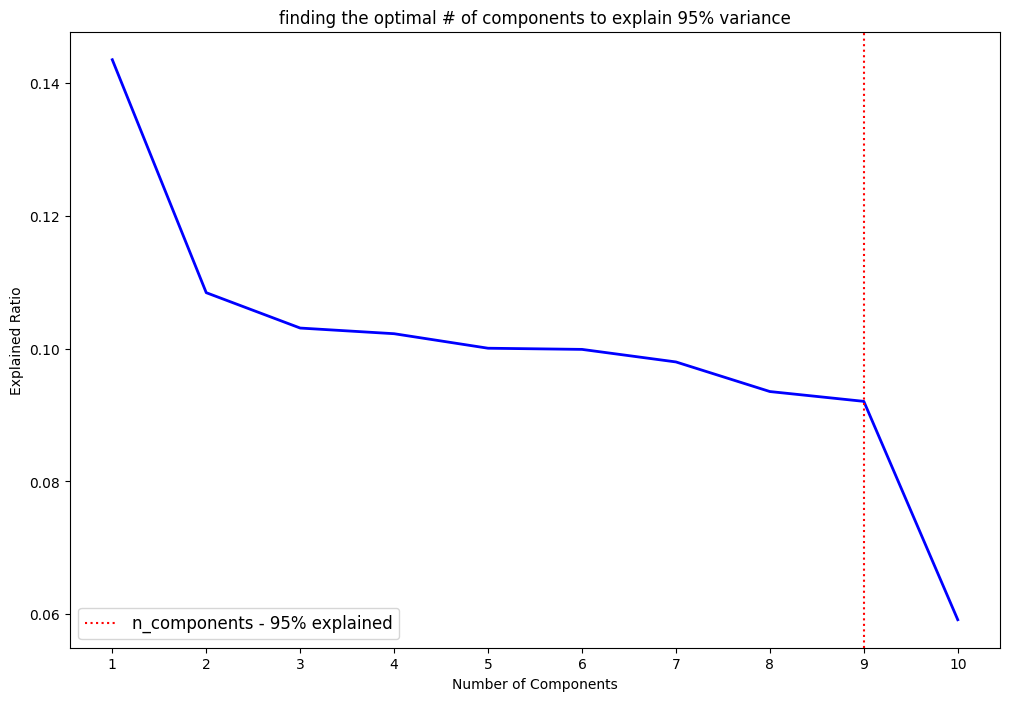

In [73]:
plt.figure(1, figsize=(12, 8))
plt.plot(range(1,11), pca.explained_variance_ratio_, linewidth=2, c="b")
plt.xlabel('Number of Components')
plt.ylabel('Explained Ratio')
plt.xticks(range(1, 11))
plt.title('finding the optimal # of components to explain 95% variance')
plt.axvline(9,linestyle=':', label='n_components - 95% explained', c ="red")
plt.legend(prop=dict(size=12))

plt.show()

**Note:**

**the best number of principal components for performing PCA on this dataset is 9 eigenvectors.**

In [74]:
# Perform the PCA with 9 components 
pca = PCA(n_components=9)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [75]:
# finding the optimal number of clusters (k-means) after runing PCA
inertia = [] 
silhouette = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(pca_data)
    k_in = kmeans.inertia_
    print('checke with {} clusters | Inertia : {}'.format(k, k_in))
    inertia.append(k_in)
    labels = kmeans.fit_predict(pca_data)
    silhouette.append(silhouette_score(pca_data, labels, sample_size=10000))

checke with 2 clusters | Inertia : 16868590.932207003
checke with 3 clusters | Inertia : 15621072.710619612
checke with 4 clusters | Inertia : 14696675.795753442
checke with 5 clusters | Inertia : 14112344.557144582
checke with 6 clusters | Inertia : 13531559.835815504
checke with 7 clusters | Inertia : 13020979.809847733
checke with 8 clusters | Inertia : 12708233.712431937
checke with 9 clusters | Inertia : 12500018.64795873
checke with 10 clusters | Inertia : 12215734.990229568


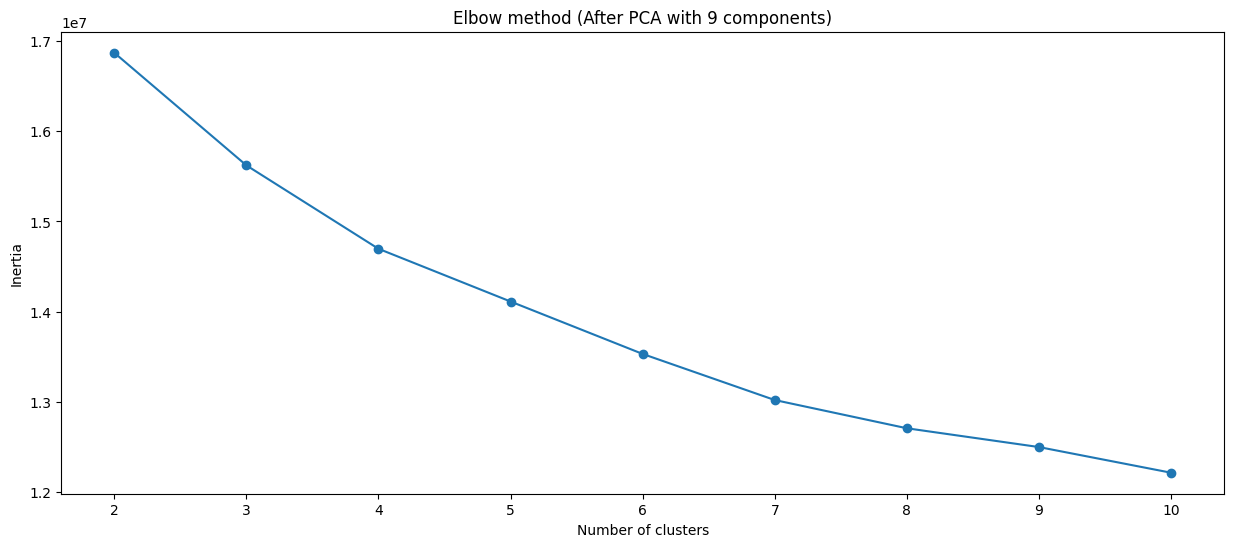

In [76]:
# ploting the Elbow method 
plt.figure(figsize=(15,6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method (After PCA with 9 components)')
plt.show()

**Note:**
**From the above plot we can come to an understanding that the inertia score starts to drop drastically between 5-6 number of clusters**

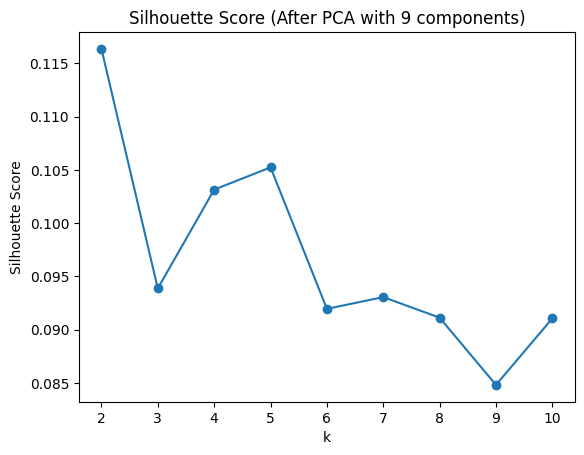

In [77]:
# Plotting the silhouette score
plt.plot(range(2, 11), silhouette, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (After PCA with 9 components)')
plt.show()

In [78]:
# Performing the k-means clustering with 5 cluster on the transformed data (PCA)
kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(pca_data)

KMeans(n_clusters=5, n_init='auto')

In [79]:
# assigning cluster labels to the data points in the dataset
clusters = kmeans.labels_
df['cluster'] = clusters 

In [80]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_number_lower,order_number_upper,cluster
0,2425083,49125,1,2,18,-1,17,1,False,13,pantry,baking ingredients,-31.921436,69.180695,1
1,2425083,49125,1,2,18,-1,91,2,False,16,dairy eggs,soy lactosefree,-31.921436,69.180695,1
2,2425083,49125,1,2,18,-1,36,3,False,16,dairy eggs,butter,-31.921436,69.180695,1
3,2425083,49125,1,2,18,-1,83,4,False,4,produce,fresh vegetables,-31.921436,69.180695,2
4,2425083,49125,1,2,18,-1,83,5,False,4,produce,fresh vegetables,-31.921436,69.180695,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,False,4,produce,fresh vegetables,-10.664385,39.180514,2
2019497,458285,128787,42,2,19,3,115,1,True,7,beverages,water seltzer sparkling water,-27.151701,93.916407,4
2019498,458285,128787,42,2,19,3,32,2,True,4,produce,packaged produce,-27.151701,93.916407,4
2019499,458285,128787,42,2,19,3,32,3,True,4,produce,packaged produce,-27.151701,93.916407,4


In [81]:
# finding the most repeated products in each cluster
grouped = df.groupby('cluster')['product_name']
top_7 = []
for cluster, group in grouped:
    top_7.append(group.value_counts().head(7))

In [82]:
top_7_df = pd.concat(top_7, axis=1)
top_7_df.columns = [f'Cluster {i}' for i in range(len(top_7))]
top_7_df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
product_name,,,,,
yogurt,54101.0,21899.0,NaN,14579.0,NaN
milk,36940.0,9437.0,NaN,8638.0,NaN
packaged cheese,29441.0,20233.0,NaN,11713.0,NaN
chips pretzels,23384.0,14723.0,NaN,NaN,NaN
soy lactosefree,23254.0,NaN,NaN,NaN,NaN
eggs,16356.0,NaN,NaN,NaN,NaN
energy granola bars,14993.0,9373.0,NaN,NaN,NaN
baking ingredients,NaN,10641.0,NaN,NaN,NaN
crackers,NaN,9792.0,NaN,NaN,NaN


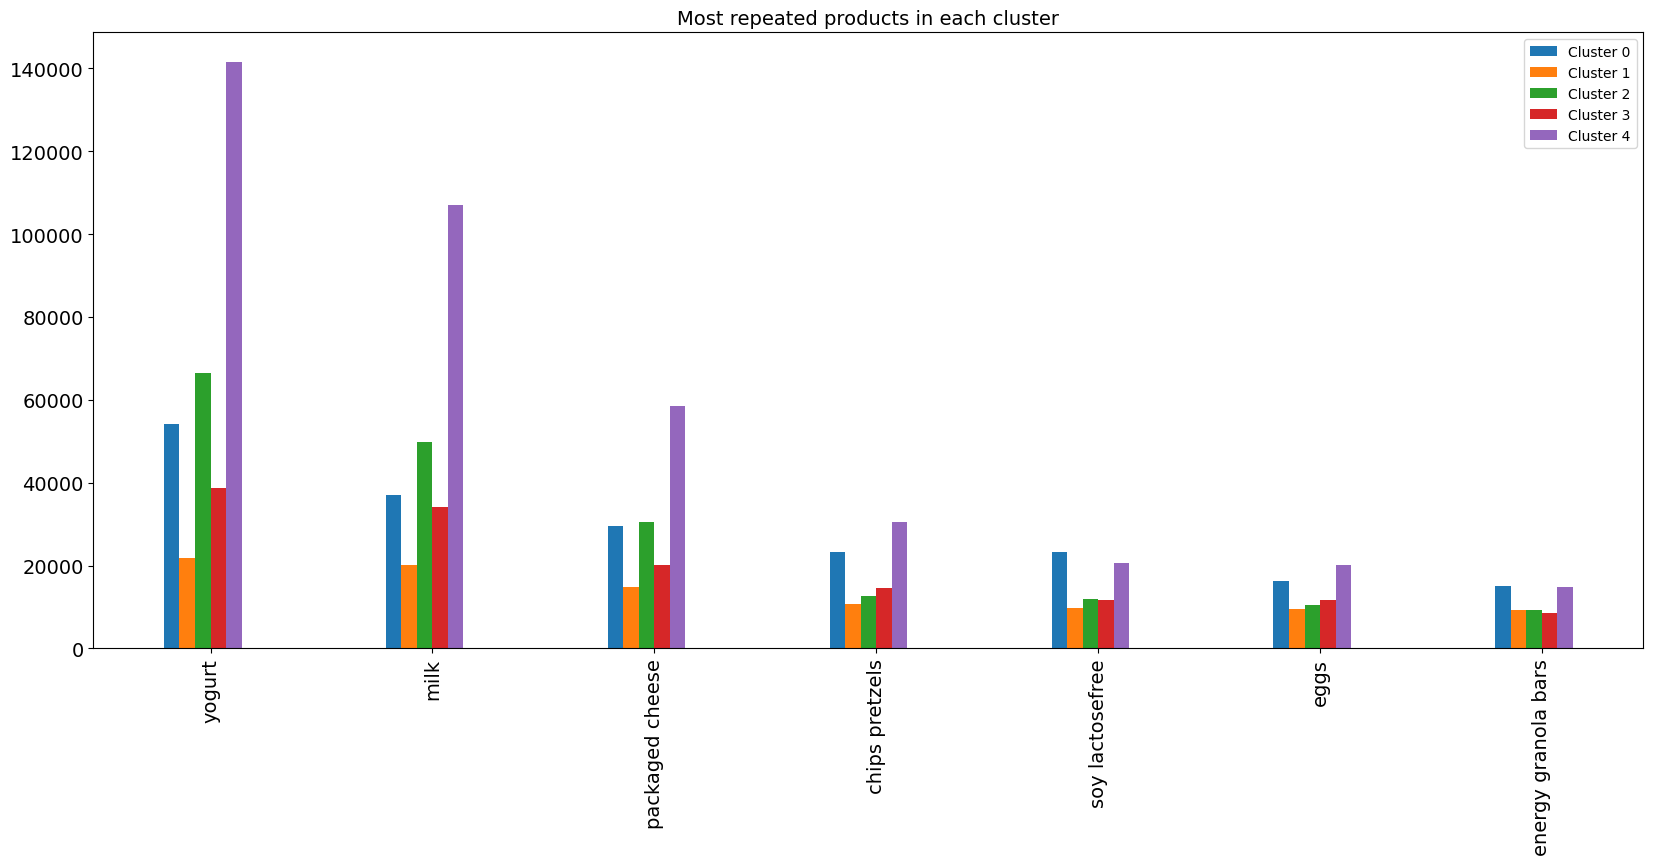

In [83]:
# create a bar plot for the above data
fig, ax = plt.subplots(figsize=(20,8))
x = np.arange(len(top_7[0].index))
width = 0.35

for i, data in enumerate(top_7):
    ax.bar(x - width/2 + i*width/len(top_7), data.values, width/len(top_7), label=f'Cluster {i}')

plt.title('Most repeated products in each cluster', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(top_7[0].index, rotation=90)
ax.tick_params(axis='both', labelsize=14)
ax.legend()
plt.show()